## Import libraries


In [ ]:
# import libraries 
import pandas as pd
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt

## Mount Google Drive 

In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Read Data 

In [ ]:
# making data frame from csv file 
data = pd.read_csv("/content/gdrive/MyDrive/Test/TestProcessed.csv") 
data

,Text
0,prepare and attend weekly call with m garrett ...
1,"sorting out final amendments agreed with dave,..."


In [ ]:
for index,text in enumerate(data["Text"]):
  print('Narrative %d:\n'%(index+1),text)

Narrative 1:
 prepare and attend weekly call with m garrett and ll regarding . apple due diligence . send project management sure sheet to lee caldwell, and liable with apple regarding  next board meeting on 12/12/2022. listen audit regarding cording from last last meeting with mb
Narrative 2:
 sorting out final amendments agreed with dave, sending dave, conversation with a lowell regarding  project b, advice given to m&s regarding  deal prepare to meet deadline on 13 oct 2020


## POS Tagging

In [ ]:
POStag = TextBlob(str(data["Text"]))

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
# help page with all the tags and meanings
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
# download package punkt to tokenise the words 
nltk.download('punkt')
# download averaged_perceptron_tagger package to tag the words accordingly 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# number of POS tags 
posdata = pd.DataFrame(POStag.tags, columns =['words', 'pos'] )
posdata = posdata['pos'].value_counts()
posdata

NN     9
JJ     3
CD     2
IN     2
NNS    1
CC     1
VBD    1
VBG    1
RP     1
Name: pos, dtype: int64

Text(0.5, 1.0, 'POS Tags in Narratives')

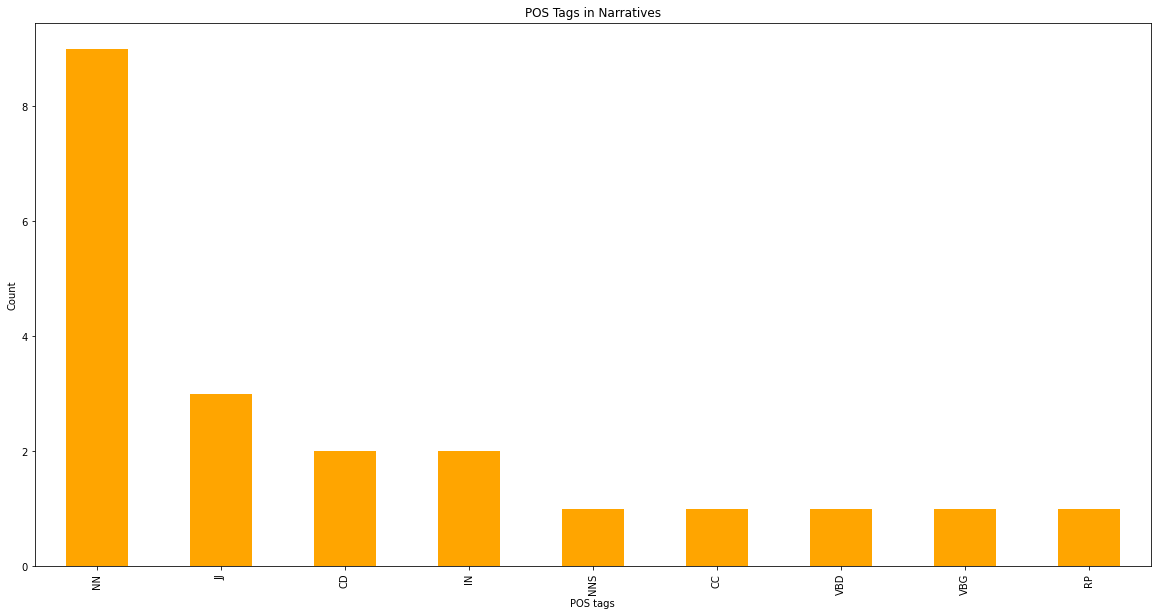

In [ ]:
# plotting the POS tags 
plt.figure(figsize=(20, 10))
posdata.plot(kind = 'bar', color ='orange')
plt.xlabel("POS tags")
plt.ylabel("Count")
plt.title("POS Tags in Narratives")

In [ ]:
# these are the pre-processed narratives 
sentence1 = """prepare and attend weekly call with m garrett and ll regarding . apple due diligence . send project management sure sheet to lee caldwell, and liable with apple regarding  next board meeting on 12/12/2022. listen audit regarding cording from last last meeting with mb"""
sentence2 = """sorting out final amendments agreed with dave, sending dave, conversation with a lowell regarding  project b, advice given to m&s regarding  deal prepare to meet deadline on 13 oct 2020"""

# tokenise the words
tokens1 = nltk.word_tokenize(sentence1)
tokens2 = nltk.word_tokenize(sentence2)

# parts of speech tagging
tagged1 = nltk.pos_tag(tokens1)
tagged2 = nltk.pos_tag(tokens2)

# print tagged tokens
print(tagged1)
print(tagged2)

[('prepare', 'NN'), ('and', 'CC'), ('attend', 'JJ'), ('weekly', 'JJ'), ('call', 'NN'), ('with', 'IN'), ('m', 'NN'), ('garrett', 'NN'), ('and', 'CC'), ('ll', 'NN'), ('regarding', 'NN'), ('.', '.'), ('apple', 'NN'), ('due', 'JJ'), ('diligence', 'NN'), ('.', '.'), ('send', 'VB'), ('project', 'JJ'), ('management', 'NN'), ('sure', 'JJ'), ('sheet', 'NN'), ('to', 'TO'), ('lee', 'VB'), ('caldwell', 'NN'), (',', ','), ('and', 'CC'), ('liable', 'JJ'), ('with', 'IN'), ('apple', 'NN'), ('regarding', 'VBG'), ('next', 'JJ'), ('board', 'NN'), ('meeting', 'NN'), ('on', 'IN'), ('12/12/2022', 'CD'), ('.', '.'), ('listen', 'VB'), ('audit', 'NN'), ('regarding', 'VBG'), ('cording', 'VBG'), ('from', 'IN'), ('last', 'JJ'), ('last', 'JJ'), ('meeting', 'NN'), ('with', 'IN'), ('mb', 'NN')]
[('sorting', 'VBG'), ('out', 'RP'), ('final', 'JJ'), ('amendments', 'NNS'), ('agreed', 'VBD'), ('with', 'IN'), ('dave', 'NN'), (',', ','), ('sending', 'VBG'), ('dave', 'NN'), (',', ','), ('conversation', 'NN'), ('with', 'IN')

In [ ]:
# these narratives were corrected by myself to see how efficient the POS tagger is 
sentence3 = """ Prepare and attend weekly call with M Barret and LC regarding Apple due diligence. Send project management spreadsheet to Lee Caldwell and liaise with Apple regarding next board meeting on 12/12/2022. Listen to audio recording from last meeting with MB"""
sentence4 = """ Sorting out final amendments agreed with Dave. Sending Dave conversation with A Howell regarding project B. Advice given to M&S regarding deal. Prepare to meet deadline on 13 Oct 2020"""

# tokenise the words
tokens3 = nltk.word_tokenize(sentence3)
tokens4 = nltk.word_tokenize(sentence4)

# parts of speech tagging
tagged3 = nltk.pos_tag(tokens3)
tagged4 = nltk.pos_tag(tokens4)

# print tagged tokens
print(tagged3)
print(tagged4)

[('Prepare', 'NNP'), ('and', 'CC'), ('attend', 'JJ'), ('weekly', 'JJ'), ('call', 'NN'), ('with', 'IN'), ('M', 'NNP'), ('Barret', 'NNP'), ('and', 'CC'), ('LC', 'NNP'), ('regarding', 'VBG'), ('Apple', 'NNP'), ('due', 'JJ'), ('diligence', 'NN'), ('.', '.'), ('Send', 'VB'), ('project', 'JJ'), ('management', 'NN'), ('spreadsheet', 'NN'), ('to', 'TO'), ('Lee', 'NNP'), ('Caldwell', 'NNP'), ('and', 'CC'), ('liaise', 'NN'), ('with', 'IN'), ('Apple', 'NNP'), ('regarding', 'VBG'), ('next', 'JJ'), ('board', 'NN'), ('meeting', 'NN'), ('on', 'IN'), ('12/12/2022', 'CD'), ('.', '.'), ('Listen', 'VB'), ('to', 'TO'), ('audio', 'VB'), ('recording', 'NN'), ('from', 'IN'), ('last', 'JJ'), ('meeting', 'NN'), ('with', 'IN'), ('MB', 'NNP')]
[('Sorting', 'VBG'), ('out', 'RP'), ('final', 'JJ'), ('amendments', 'NNS'), ('agreed', 'VBD'), ('with', 'IN'), ('Dave', 'NNP'), ('.', '.'), ('Sending', 'VBG'), ('Dave', 'NNP'), ('conversation', 'NN'), ('with', 'IN'), ('A', 'NNP'), ('Howell', 'NNP'), ('regarding', 'VBG'), (